<a href="https://colab.research.google.com/github/Sreyas2403/OCM_HeavyVehicle_Analysis/blob/main/OCM_ML_RegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

# Load the dataset
file_path = '/content/Cleaned_OCM_Timeleft_300h_30h_0h.csv'
df = pd.read_csv(file_path)

# Assuming 'Timestamp' and other relevant columns are features and 'Timeleft' is the target
X = df.drop(columns=['RUL'])
y = df['RUL']

# Convert Timeleft to a numeric value in seconds for regression purposes
def timeleft_to_seconds(timeleft):
    hours, minutes, seconds = map(int, timeleft.split(':'))
    return hours * 3600 + minutes * 60 + seconds

y = y.apply(timeleft_to_seconds)

# Check the first few rows to understand the data
print(X.head())
print(y.head())


          Timestamp  Relative Humidity  Sweep Count  \
0  24-05-2024 14:03               2096            2   
1  24-05-2024 14:04               2096            2   
2  24-05-2024 14:04               2096            2   
3  24-05-2024 14:05               2332            3   
4  24-05-2024 14:05               2332            3   

   Interfacial Temperature Pre Refrence  Interfacial Temperature Post Sample  \
0                                  28.7                                 28.7   
1                                  28.7                                 28.7   
2                                  28.7                                 28.7   
3                                  28.9                                 28.9   
4                                  28.9                                 28.9   

   Bulk Temperature Post Sample  High Frequency Temperature Post Sample  \
0                          28.9                                    28.9   
1                          28.9       

In [ ]:
# Convert 'Timestamp' to datetime and extract useful features
X['Timestamp'] = pd.to_datetime(X['Timestamp'], format="%d-%m-%Y %H:%M")

# Extracting features from 'Timestamp'
X['Hour'] = X['Timestamp'].dt.hour
X['Minute'] = X['Timestamp'].dt.minute
X['Day'] = X['Timestamp'].dt.day
X['Month'] = X['Timestamp'].dt.month
X['Year'] = X['Timestamp'].dt.year

# Drop the original 'Timestamp' column
X = X.drop(columns=['Timestamp'])

# Function to split and convert columns to numeric
def split_and_convert(col, new_cols):
    split_df = col.str.split(',', expand=True)
    split_df.columns = new_cols
    for col in new_cols:
        split_df[col] = pd.to_numeric(split_df[col], errors='coerce')
    return split_df

# Split and convert 'Ferrous Particle Bin Upper Endpoints'
ferrous_cols = ['PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'PF6', 'PF7', 'PF8', 'PF9', 'PF10']
ferrous_split = split_and_convert(X['Ferrous Particle Bin Upper Endpoints'], ferrous_cols)
X = pd.concat([X, ferrous_split], axis=1)
X = X.drop(columns=['Ferrous Particle Bin Upper Endpoints'])

# Split and convert 'Nonferrous Particle Bins Upper Endpoints'
nonferrous_cols = ['NPF1', 'NPF2', 'NPF3', 'NPF4', 'NPF5', 'NPF6', 'NPF7', 'NPF8', 'NPF9', 'NPF10']
nonferrous_split = split_and_convert(X['Nonferrous Particle Bins Upper Endpoints'], nonferrous_cols)
X = pd.concat([X, nonferrous_split], axis=1)
X = X.drop(columns=['Nonferrous Particle Bins Upper Endpoints'])

# Fill missing values or drop rows/columns with missing values
X = X.fillna(0)

print(X.head())


   Relative Humidity  Sweep Count  Interfacial Temperature Pre Refrence  \
0               2096            2                                  28.7   
1               2096            2                                  28.7   
2               2096            2                                  28.7   
3               2332            3                                  28.9   
4               2332            3                                  28.9   

   Interfacial Temperature Post Sample  Bulk Temperature Post Sample  \
0                                 28.7                          28.9   
1                                 28.7                          28.9   
2                                 28.7                          28.9   
3                                 28.9                          29.0   
4                                 28.9                          29.0   

   High Frequency Temperature Post Sample  Interfacial Impedance  \
0                                    28.9       

In [ ]:
# Convert 'Timestamp' to datetime and extract useful features
X['Timestamp'] = pd.to_datetime(X['Timestamp'], format="%d-%m-%Y %H:%M")

# Extracting features from 'Timestamp'
X['Hour'] = X['Timestamp'].dt.hour
X['Minute'] = X['Timestamp'].dt.minute
X['Day'] = X['Timestamp'].dt.day
X['Month'] = X['Timestamp'].dt.month
X['Year'] = X['Timestamp'].dt.year

# Drop the original 'Timestamp' column
X = X.drop(columns=['Timestamp'])

# Split 'Ferrous Particle Bin Upper Endpoints' into separate columns
ferrous_cols = ['PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'PF6', 'PF7', 'PF8', 'PF9', 'PF10']
ferrous_split = X['Ferrous Particle Bin Upper Endpoints'].str.split(',', expand=True)
ferrous_split.columns = ferrous_cols
X = pd.concat([X, ferrous_split], axis=1)
X = X.drop(columns=['Ferrous Particle Bin Upper Endpoints'])

# Split 'Nonferrous Particle Bins Upper Endpoints' into separate columns
nonferrous_cols = ['NPF1', 'NPF2', 'NPF3', 'NPF4', 'NPF5', 'NPF6', 'NPF7', 'NPF8', 'NPF9', 'NPF10']
nonferrous_split = X['Nonferrous Particle Bins Upper Endpoints'].str.split(',', expand=True)
nonferrous_split.columns = nonferrous_cols
X = pd.concat([X, nonferrous_split], axis=1)
X = X.drop(columns=['Nonferrous Particle Bins Upper Endpoints'])

# Convert all new columns to numeric, handle any conversion errors
X[ferrous_cols + nonferrous_cols] = X[ferrous_cols + nonferrous_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values or drop rows/columns with missing values
X = X.fillna(0)

print(X.head())


   Relative Humidity  Sweep Count  Interfacial Temperature Pre Refrence  \
0               2096            2                                  28.7   
1               2096            2                                  28.7   
2               2096            2                                  28.7   
3               2332            3                                  28.9   
4               2332            3                                  28.9   

   Interfacial Temperature Post Sample  Bulk Temperature Post Sample  \
0                                 28.7                          28.9   
1                                 28.7                          28.9   
2                                 28.7                          28.9   
3                                 28.9                          29.0   
4                                 28.9                          29.0   

   High Frequency Temperature Post Sample  Interfacial Impedance  \
0                                    28.9       

In [ ]:
# Convert 'Timestamp' to datetime and extract useful features
X['Timestamp'] = pd.to_datetime(X['Timestamp'], format="%d-%m-%Y %H:%M")

# Extracting features from 'Timestamp'
X['Hour'] = X['Timestamp'].dt.hour
X['Minute'] = X['Timestamp'].dt.minute
X['Day'] = X['Timestamp'].dt.day
X['Month'] = X['Timestamp'].dt.month
X['Year'] = X['Timestamp'].dt.year

# Drop the original 'Timestamp' column
X = X.drop(columns=['Timestamp'])

# Function to split and convert columns to numeric
def split_and_convert(col, new_cols):
    split_df = col.str.split(',', expand=True)
    split_df.columns = new_cols
    for col in new_cols:
        split_df[col] = pd.to_numeric(split_df[col], errors='coerce')
    return split_df

# Split and convert 'Ferrous Particle Bin Upper Endpoints'
ferrous_cols = ['PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'PF6', 'PF7', 'PF8', 'PF9', 'PF10']
ferrous_split = split_and_convert(X['Ferrous Particle Bin Upper Endpoints'], ferrous_cols)
X = pd.concat([X, ferrous_split], axis=1)
X = X.drop(columns=['Ferrous Particle Bin Upper Endpoints'])

# Split and convert 'Nonferrous Particle Bins Upper Endpoints'
nonferrous_cols = ['NPF1', 'NPF2', 'NPF3', 'NPF4', 'NPF5', 'NPF6', 'NPF7', 'NPF8', 'NPF9', 'NPF10']
nonferrous_split = split_and_convert(X['Nonferrous Particle Bins Upper Endpoints'], nonferrous_cols)
X = pd.concat([X, nonferrous_split], axis=1)
X = X.drop(columns=['Nonferrous Particle Bins Upper Endpoints'])

# Fill missing values or drop rows/columns with missing values
X = X.fillna(0)

print(X.head())


   Relative Humidity  Sweep Count  Interfacial Temperature Pre Refrence  \
0               2096            2                                  28.7   
1               2096            2                                  28.7   
2               2096            2                                  28.7   
3               2332            3                                  28.9   
4               2332            3                                  28.9   

   Interfacial Temperature Post Sample  Bulk Temperature Post Sample  \
0                                 28.7                          28.9   
1                                 28.7                          28.9   
2                                 28.7                          28.9   
3                                 28.9                          29.0   
4                                 28.9                          29.0   

   High Frequency Temperature Post Sample  Interfacial Impedance  \
0                                    28.9       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')


ValueError: could not convert string to float: '2951,1576,151,8,0,1,0'

In [ ]:
# Convert 'Timestamp' to datetime and extract useful features
X['Timestamp'] = pd.to_datetime(X['Timestamp'], format="%d-%m-%Y %H:%M")

# Extracting features from 'Timestamp'
X['Hour'] = X['Timestamp'].dt.hour
X['Minute'] = X['Timestamp'].dt.minute
X['Day'] = X['Timestamp'].dt.day
X['Month'] = X['Timestamp'].dt.month
X['Year'] = X['Timestamp'].dt.year

# Drop the original 'Timestamp' column
X = X.drop(columns=['Timestamp'])

# Function to split and convert columns to numeric
def split_and_convert(col, new_cols):
    split_df = col.str.split(',', expand=True)
    split_df.columns = new_cols
    for col in new_cols:
        split_df[col] = pd.to_numeric(split_df[col], errors='coerce')
    return split_df

# Split and convert 'Ferrous Particle Bin Upper Endpoints'
ferrous_cols = ['PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'PF6', 'PF7', 'PF8', 'PF9', 'PF10']
ferrous_split = split_and_convert(X['Ferrous Particle Bin Upper Endpoints'], ferrous_cols)
X = pd.concat([X, ferrous_split], axis=1)
X = X.drop(columns=['Ferrous Particle Bin Upper Endpoints'])

# Split and convert 'Nonferrous Particle Bins Upper Endpoints'
nonferrous_cols = ['NPF1', 'NPF2', 'NPF3', 'NPF4', 'NPF5', 'NPF6', 'NPF7', 'NPF8', 'NPF9', 'NPF10']
nonferrous_split = split_and_convert(X['Nonferrous Particle Bins Upper Endpoints'], nonferrous_cols)
X = pd.concat([X, nonferrous_split], axis=1)
X = X.drop(columns=['Nonferrous Particle Bins Upper Endpoints'])

# Fill missing values or drop rows/columns with missing values
X = X.fillna(0)

print(X.head())


   Relative Humidity  Sweep Count  Interfacial Temperature Pre Refrence  \
0               2096            2                                  28.7   
1               2096            2                                  28.7   
2               2096            2                                  28.7   
3               2332            3                                  28.9   
4               2332            3                                  28.9   

   Interfacial Temperature Post Sample  Bulk Temperature Post Sample  \
0                                 28.7                          28.9   
1                                 28.7                          28.9   
2                                 28.7                          28.9   
3                                 28.9                          29.0   
4                                 28.9                          29.0   

   High Frequency Temperature Post Sample  Interfacial Impedance  \
0                                    28.9       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')


ValueError: could not convert string to float: '2793,1533,150,7,0,1,0'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the CSV file
file_path = '/content/Cleaned_OCM_Timeleft_300h_30h_0h.csv'
data = pd.read_csv(file_path)

# Convert 'RUL' to numeric type
data['RUL'] = pd.to_numeric(data['RUL'], errors='coerce')

# Drop rows with missing 'RUL' values
data = data.dropna(subset=['RUL'])

# Convert remaining object columns to numeric if possible
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill remaining NaNs with column mean
data = data.fillna(data.mean())

# Verify the data types and ensure no NaNs are present
print(data.info())
print(data.isna().sum().sum())

# Separate features and target
X = data.drop(columns=['RUL', 'Timestamp'])
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Timestamp                                 0 non-null      int64  
 1   Relative Humidity                         0 non-null      int64  
 2   Sweep Count                               0 non-null      int64  
 3   Interfacial Temperature Pre Refrence      0 non-null      float64
 4   Interfacial Temperature Post Sample       0 non-null      float64
 5   Bulk Temperature Post Sample              0 non-null      float64
 6   High Frequency Temperature Post Sample    0 non-null      float64
 7   Interfacial Impedance                     0 non-null      int64  
 8   Bulk Resistance                           0 non-null      int64  
 9   High Frequency Bulk                       0 non-null      int64  
 10  Electronics Board Temperature             0 non-null   

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the CSV file
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
data = pd.read_csv(file_path)

# Convert 'RUL' to numeric type
data['RUL'] = pd.to_numeric(data['RUL'], errors='coerce')

# Drop rows with missing 'RUL' values
data = data.dropna(subset=['RUL'])

# Convert remaining object columns to numeric if possible
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill remaining NaNs with column mean
data = data.fillna(data.mean())

# Verify the data types and ensure no NaNs are present
print(data.info())
print("Total NaNs remaining:", data.isna().sum().sum())

# Ensure there are enough valid samples
print("Number of samples after preprocessing:", len(data))

# Separate features and target
X = data.drop(columns=['RUL'])
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Check if training data is non-empty
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

if len(X_train) > 0 and len(X_test) > 0:
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
else:
    print("Not enough samples to train the model.")


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Timestamp                               0 non-null      int64  
 1   Relative Humidity                       0 non-null      int64  
 2   Sweep Count                             0 non-null      int64  
 3   Interfacial Temperature Pre Refrence    0 non-null      float64
 4   Interfacial Temperature Post Sample     0 non-null      float64
 5   Bulk Temperature Post Sample            0 non-null      float64
 6   High Frequency Temperature Post Sample  0 non-null      float64
 7   Interfacial Impedance                   0 non-null      int64  
 8   Bulk Resistance                         0 non-null      int64  
 9   High Frequency Bulk                     0 non-null      int64  
 10  Electronics Board Temperature           0 non-null      int64  
 11  Flow Rate 

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file
df = pd.read_csv('/content/Cleaned_OCM_Timeleft_300h_30h_0h.csv')

# Split the data into features (X) and target (y)
X = df.drop(columns=['RUL'])
y = df['RUL']

# Define hyperparameter tuning space
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10]}

# Create a random forest regressor model
model = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning with k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f'Best Hyperparameters: {best_params}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-Squared (R2): {r2:.2f}')

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '24-05-2024 14:04'

--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '24-05-2024 14:03'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the CSV file
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
data = pd.read_csv(file_path)

# Convert 'RUL' to numeric type
data['RUL'] = pd.to_numeric(data['RUL'], errors='coerce')

# Drop rows with missing 'RUL' values
data = data.dropna(subset=['RUL'])

# Convert remaining object columns to numeric if possible
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill remaining NaNs with column mean
data = data.fillna(data.mean())

# Verify the data types and ensure no NaNs are present
print(data.info())
print("Total NaNs remaining:", data.isna().sum().sum())

# Ensure there are enough valid samples
print("Number of samples after preprocessing:", len(data))

# Separate features and target
X = data.drop(columns=['RUL', 'Timestamp'])
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, test_size=0.2, random_state=42)

# Check if training data is non-empty
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

if len(X_train) > 0 and len(X_test) > 0:
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
else:
    print("Not enough samples to train the model.")


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Timestamp                               0 non-null      int64  
 1   Relative Humidity                       0 non-null      int64  
 2   Sweep Count                             0 non-null      int64  
 3   Interfacial Temperature Pre Refrence    0 non-null      float64
 4   Interfacial Temperature Post Sample     0 non-null      float64
 5   Bulk Temperature Post Sample            0 non-null      float64
 6   High Frequency Temperature Post Sample  0 non-null      float64
 7   Interfacial Impedance                   0 non-null      int64  
 8   Bulk Resistance                         0 non-null      int64  
 9   High Frequency Bulk                     0 non-null      int64  
 10  Electronics Board Temperature           0 non-null      int64  
 11  Flow Rate 

ValueError: With n_samples=0, test_size=0.2 and train_size=0.8, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
data = pd.read_csv(file_path)

# Prepare the data
X = data.drop(columns=['RUL'])
y = data['RUL']

problematic_column = "Timestamp"  # Replace with the actual column name
if problematic_column in X.columns:
  X = X.drop(problematic_column, axis=1)  # Remove the problematic column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Plot actual vs. predicted RUL values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.title('Actual vs. Predicted RUL')
plt.legend()
plt.show()


ValueError: could not convert string to float: 'undefined'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load your CSV data
data = pd.read_csv("/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv")


# Separate features and target variable
X = data.drop("RUL", axis=1)  # All columns except "RUL"
y = data["RUL"]

# Handle missing values (if any)
# ... (replace with your missing value imputation method)
problematic_column = "Timestamp"  # Replace with the actual column name
if problematic_column in X.columns:
  X = X.drop(problematic_column, axis=1)  # Remove the problematic column

# Handle "undefined" values (replace with your chosen approach)
X = X.replace('undefined', np.nan)  # Replace "undefined" with NaN
X = X.replace('undefind  ', np.nan)
# Example: Extract hours, minutes, seconds from "y" (replace with your actual column name)
def extract_time_features(time_str):
  hours, minutes, seconds = map(int, time_str.split(":"))
  return hours, minutes, seconds

y_hours, y_minutes, y_seconds = y.apply(lambda x: extract_time_features(x))

# Add these new features to your training data (consider replacing existing "y")
# ...

# Standardize features (optional, but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Train the model (Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on testing data
y_pred = model.predict(X_test)

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Further evaluation and model improvement
# ... (optional)


ValueError: too many values to unpack (expected 3)

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
df = pd.read_csv(file_path)

# Assuming 'Timestamp' and other relevant columns are features and 'Timeleft' is the target
X = df.drop(columns=['RUL'])
y = df['RUL']

# Convert Timeleft to a numeric value in seconds for regression purposes
def timeleft_to_seconds(timeleft):
    hours, minutes, seconds = map(int, timeleft.split(':'))
    return hours * 3600 + minutes * 60 + seconds

y = y.apply(timeleft_to_seconds)

# Check the first few rows to understand the data
print(X.head())
print(y.head())


          Timestamp  Relative Humidity  Sweep Count  \
0  24-05-2024 14:03               2096            2   
1  24-05-2024 14:04               2096            2   
2  24-05-2024 14:04               2096            2   
3  24-05-2024 14:05               2332            3   
4  24-05-2024 14:05               2332            3   

   Interfacial Temperature Pre Refrence  Interfacial Temperature Post Sample  \
0                                  28.7                                 28.7   
1                                  28.7                                 28.7   
2                                  28.7                                 28.7   
3                                  28.9                                 28.9   
4                                  28.9                                 28.9   

   Bulk Temperature Post Sample  High Frequency Temperature Post Sample  \
0                          28.9                                    28.9   
1                          28.9       

In [ ]:
# Convert 'Timestamp' to datetime and extract useful features
X['Timestamp'] = pd.to_datetime(X['Timestamp'], format="%d-%m-%Y %H:%M")

# Extracting features from 'Timestamp'
X['Hour'] = X['Timestamp'].dt.hour
X['Minute'] = X['Timestamp'].dt.minute
X['Day'] = X['Timestamp'].dt.day
X['Month'] = X['Timestamp'].dt.month
X['Year'] = X['Timestamp'].dt.year

# Drop the original 'Timestamp' column
X = X.drop(columns=['Timestamp'])

# Function to split and convert columns to numeric
def split_and_convert(col, new_cols):
    split_df = col.str.split(',', expand=True)
    split_df.columns = new_cols
    for col in new_cols:
        split_df[col] = pd.to_numeric(split_df[col], errors='coerce')
    return split_df

# Split and convert 'Ferrous Particle Bin Upper Endpoints'
ferrous_cols = ['PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'PF6', 'PF7', 'PF8', 'PF9', 'PF10']
ferrous_split = split_and_convert( ferrous_cols)
X = pd.concat([X, ferrous_split], axis=1)

# Split and convert 'Nonferrous Particle Bins Upper Endpoints'    q
nonferrous_cols = ['NPF1', 'NPF2', 'NPF3', 'NPF4', 'NPF5', 'NPF6', 'NPF7', 'NPF8', 'NPF9', 'NPF10']
nonferrous_split = split_and_convert( nonferrous_cols)
X = pd.concat([X, nonferrous_split], axis=1)

# Fill missing values or drop rows/columns with missing values
X = X.fillna(0)

print(X.head())


TypeError: split_and_convert() missing 1 required positional argument: 'new_cols'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
df = pd.read_csv(file_path)

# Function to convert "hh:mm:ss" to total seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Convert 'Timeleft' to total seconds
df['Timeleft_seconds'] = df['RUL'].apply(time_to_seconds)

# Prepare feature columns (assuming all columns except 'Timeleft' and 'Timeleft_seconds' are features)
features = df.drop(columns=['RUL', 'Timeleft_seconds'])

# Convert any categorical columns to numerical (if necessary)
features = pd.get_dummies(features)

# Target column
target = df['Timeleft_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Function to convert total seconds to "hh:mm:ss"
def seconds_to_time(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'

# Convert predicted values back to "hh:mm:ss"
y_pred_time = [seconds_to_time(y) for y in y_pred]

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual Timeleft': [seconds_to_time(y) for y in y_test],
    'Predicted Timeleft': y_pred_time
})

# Save the results to a new CSV file
results.to_csv('Timeleft_Predictions.csv', index=False)
print("Predictions saved to 'Timeleft_Predictions.csv'")


Mean Absolute Error: 98.80399553116085
Predictions saved to 'Timeleft_Predictions.csv'


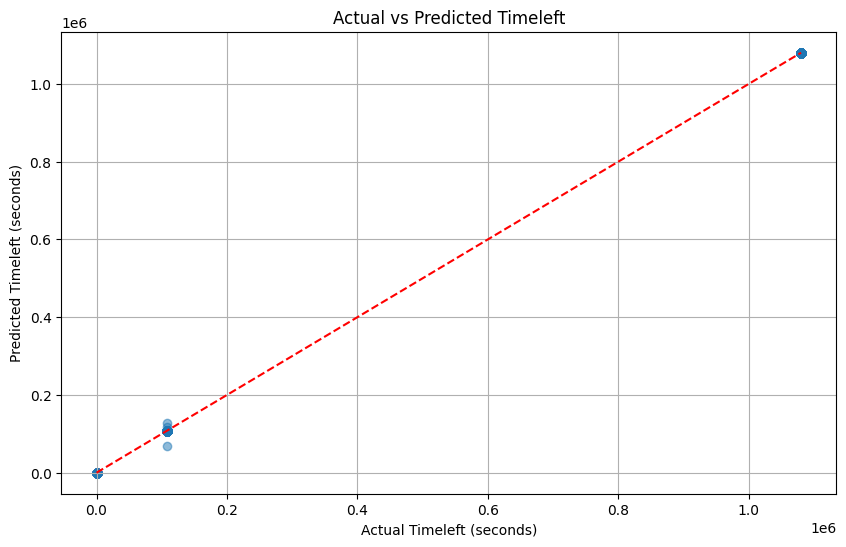

In [ ]:
import matplotlib.pyplot as plt

# Generate the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Timeleft (seconds)')
plt.ylabel('Predicted Timeleft (seconds)')
plt.title('Actual vs Predicted Timeleft')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Reduced Mean Absolute Error: 78.43978995235854
Predictions saved to 'Timeleft_Predictions.csv'


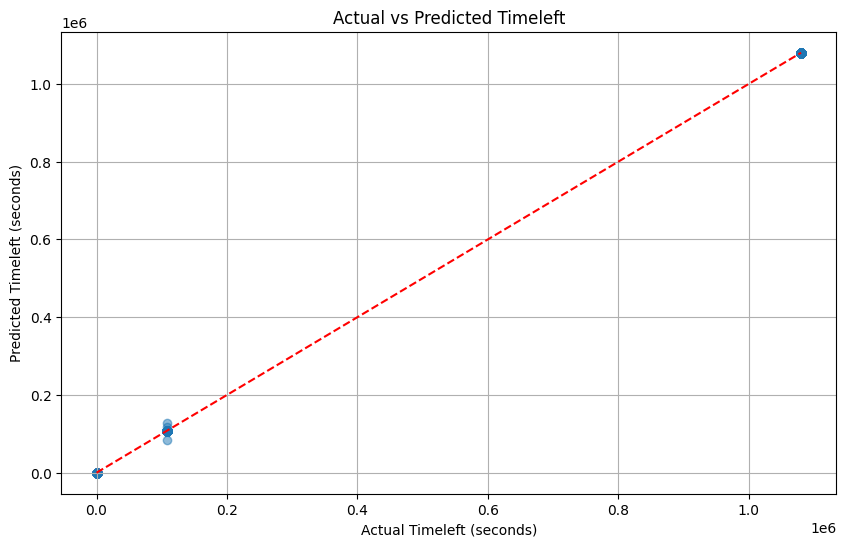

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
df = pd.read_csv(file_path)

# Function to convert "hh:mm:ss" to total seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Convert 'Timeleft' to total seconds
df['Timeleft_seconds'] = df['RUL'].apply(time_to_seconds)

# Prepare feature columns (assuming all columns except 'Timeleft' and 'Timeleft_seconds' are features)
features = df.drop(columns=['RUL', 'Timeleft_seconds'])

# Convert any categorical columns to numerical (if necessary)
features = pd.get_dummies(features)

# Target column
target = df['Timeleft_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict on the test set with the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Reduced Mean Absolute Error: {mae}')

# Function to convert total seconds to "hh:mm:ss"
def seconds_to_time(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'

# Convert predicted values back to "hh:mm:ss"
y_pred_time = [seconds_to_time(y) for y in y_pred]

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual Timeleft': [seconds_to_time(y) for y in y_test],
    'Predicted Timeleft': y_pred_time
})

# Save the results to a new CSV file
results.to_csv('MLmodel_Timeleft_Predictions.csv', index=False)
print("Predictions saved to 'Timeleft_Predictions.csv'")

# Generate the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Timeleft (seconds)')
plt.ylabel('Predicted Timeleft (seconds)')
plt.title('Actual vs Predicted Timeleft in RFR')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Reduced Mean Absolute Error: 468.15735910305057
Predictions saved to 'Timeleft_Predictions_GBR.csv'


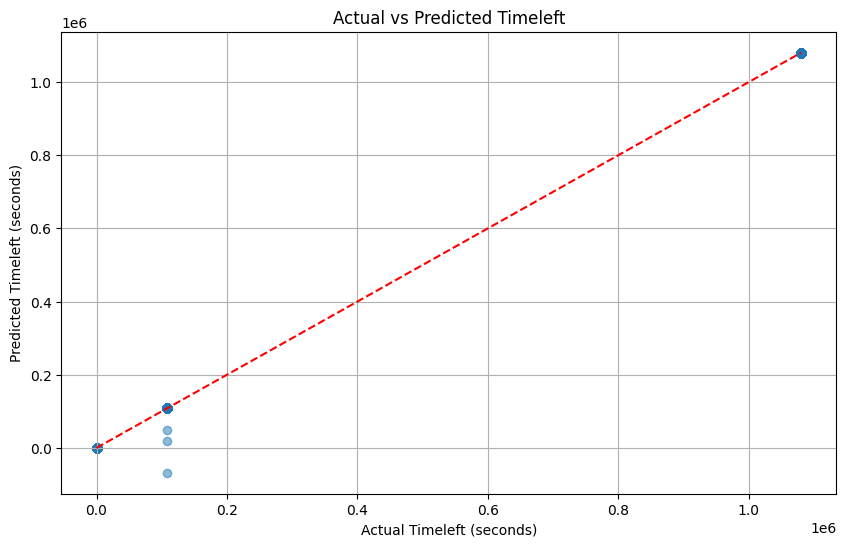

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
df = pd.read_csv(file_path)

# Function to convert "hh:mm:ss" to total seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Convert 'Timeleft' to total seconds
df['Timeleft_seconds'] = df['RUL'].apply(time_to_seconds)

# Prepare feature columns (assuming all columns except 'Timeleft' and 'Timeleft_seconds' are features)
features = df.drop(columns=['RUL', 'Timeleft_seconds'])

# Convert any categorical columns to numerical (if necessary)
features = pd.get_dummies(features)

# Target column
target = df['Timeleft_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gbr = grid_search.best_estimator_

# Predict on the test set with the best estimator
y_pred = best_gbr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Reduced Mean Absolute Error: {mae}')

# Function to convert total seconds to "hh:mm:ss"
def seconds_to_time(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'

# Convert predicted values back to "hh:mm:ss"
y_pred_time = [seconds_to_time(y) for y in y_pred]

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual Timeleft': [seconds_to_time(y) for y in y_test],
    'Predicted Timeleft': y_pred_time
})

# Save the results to a new CSV file
results.to_csv('GBR_Timeleft_Predictions.csv', index=False)
print("Predictions saved to 'Timeleft_Predictions_GBR.csv'")

# Generate the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Timeleft (seconds)')
plt.ylabel('Predicted Timeleft (seconds)')
plt.title('Actual vs Predicted Timeleft')
plt.grid(True)
plt.show()


Mean Absolute Error: 71696.7607168261
Predictions saved to 'Timeleft_Predictions_LR.csv'


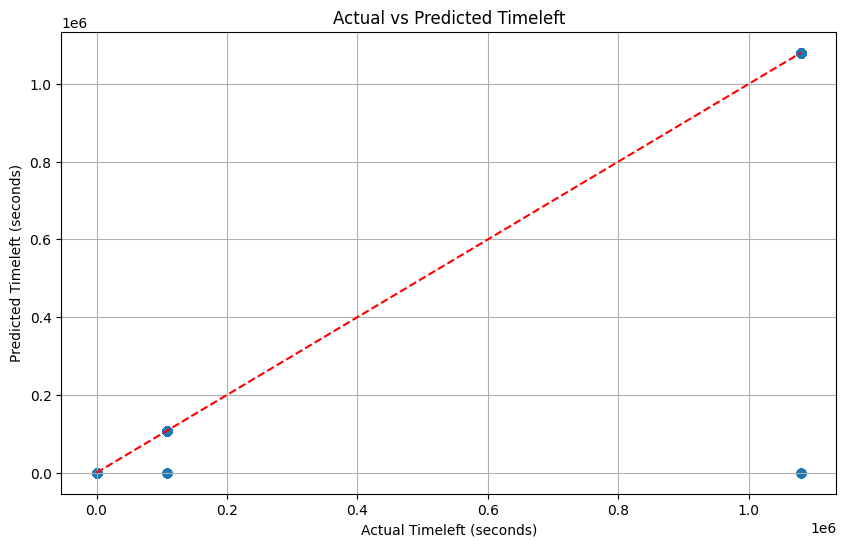

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
df = pd.read_csv(file_path)

# Function to convert "hh:mm:ss" to total seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Convert 'Timeleft' to total seconds
df['Timeleft_seconds'] = df['RUL'].apply(time_to_seconds)

# Prepare feature columns (assuming all columns except 'Timeleft' and 'Timeleft_seconds' are features)
features = df.drop(columns=['RUL', 'Timeleft_seconds'])

# Convert any categorical columns to numerical (if necessary)
features = pd.get_dummies(features)

# Target column
target = df['Timeleft_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the LinearRegression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Function to convert total seconds to "hh:mm:ss"
def seconds_to_time(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'

# Convert predicted values back to "hh:mm:ss"
y_pred_time = [seconds_to_time(y) for y in y_pred]

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual Timeleft': [seconds_to_time(y) for y in y_test],
    'Predicted Timeleft': y_pred_time
})

# Save the results to a new CSV file
results.to_csv('LR_Timeleft_Predictions.csv', index=False)
print("Predictions saved to 'Timeleft_Predictions_LR.csv'")

# Generate the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Timeleft (seconds)')
plt.ylabel('Predicted Timeleft (seconds)')
plt.title('Actual vs Predicted Timeleft')
plt.grid(True)
plt.show()


Mean Absolute Error: 19257.140364448456
Predictions saved to 'Timeleft_Predictions_Ridge.csv'


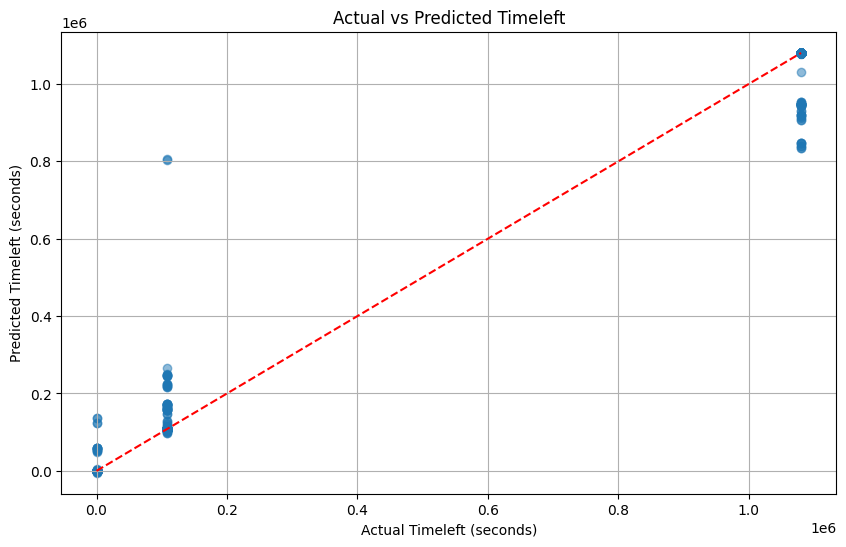

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/NewCleaned_OCM_Timeleft_300h_30h_0h.csv'
df = pd.read_csv(file_path)

# Function to convert "hh:mm:ss" to total seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Convert 'Timeleft' to total seconds
df['Timeleft_seconds'] = df['RUL'].apply(time_to_seconds)

# Prepare feature columns (assuming all columns except 'Timeleft' and 'Timeleft_seconds' are features)
features = df.drop(columns=['RUL', 'Timeleft_seconds'])

# Convert any categorical columns to numerical (if necessary)
features = pd.get_dummies(features)

# Target column
target = df['Timeleft_seconds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model
ridge = Ridge(alpha=1.0)

# Train the model
ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Function to convert total seconds to "hh:mm:ss"
def seconds_to_time(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'

# Convert predicted values back to "hh:mm:ss"
y_pred_time = [seconds_to_time(y) for y in y_pred]

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual Timeleft': [seconds_to_time(y) for y in y_test],
    'Predicted Timeleft': y_pred_time
})

# Save the results to a new CSV file
results.to_csv('RidgeLR_Timeleft_Predictions.csv', index=False)
print("Predictions saved to 'Timeleft_Predictions_Ridge.csv'")

# Generate the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Timeleft (seconds)')
plt.ylabel('Predicted Timeleft (seconds)')
plt.title('Actual vs Predicted Timeleft')
plt.grid(True)
plt.show()
